In [ ]:
'''
PURPOSE: 
Download images from web into a folder.
    should I store each actor in a different folder? 
    Do not download if images take too long
    -----Do not download if broken link
    -----save images as actorname_number
Crop to bounding boxes, convert to grayscale and resize images. 
'''

In [ ]:
import urllib
import os
import numpy as np
import pandas as pd
from random import randrange
import sys
from scipy.misc import imread, imshow, imresize
import matplotlib.pyplot as plt

In [ ]:
def rgb2gray(rgb):
    '''Return the grayscale version of the RGB image rgb as a 2D numpy array
    whose range is 0..1
    Arguments:
    rgb -- an RGB image, represented as a numpy array of size n x m x 3. The
    range of the values is 0..255
    '''
    
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray/255.

In [230]:
def process_img(image, coords):
    image_cropped = image[coords[1]:coords[3], coords[0]:coords[2], :]
    image_gray  = rgb2gray(image_cropped)
    processed_image = imresize(image_gray, (32,32))
    
    return processed_image

/Users/Admin/anaconda3/envs/CSC411_py2_env/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


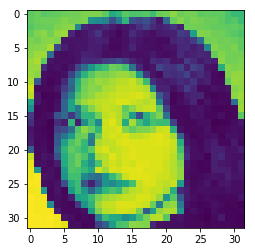

In [231]:
image0_processed = process_img(image0,(25,16,170,192))
plt.imshow(image0_processed)

array([[185, 190, 183, ..., 177, 169, 168],
       [187, 190, 192, ..., 179, 182, 172],
       [183, 189, 190, ..., 186, 188, 183],
       ...,
       [241, 237, 239, ...,  19,  20,  21],
       [241, 240, 239, ...,  19,  19,  18],
       [241, 240, 240, ...,  22,  20,  20]], dtype=uint8)

In [ ]:
act = list(set([a.split("\n")[0] for a in open("subset_actors.txt").readlines()]))

In [ ]:
#read line of image data
facescrub_actresses = pd.read_table("facescrub_actresses.txt",sep="\t",header=None)
facescrub_actresses.columns = ["Name", "Col1", "Col2", "URL", "Coordinates", "Col5"]

In [ ]:
#Delete columns with seemingly gibberish data
facescrub_actresses_trimmed = facescrub_actresses.drop(facescrub_actresses.columns[[1,2,5]], axis = 1)

In [ ]:
facescrub_actresses_trimmed.head(10)

In [ ]:
#create directory for uncropped images
current_directory = os.getcwd()
images = os.path.join(current_directory, r'images')
if not os.path.exists(images):
   os.makedirs(images)

In [ ]:
#create directory for each actor
for actor in act:
    actor_directory = os.path.join(images,actor)
    if not os.path.exists(actor_directory):
        os.makedirs(actor_directory)
        os.makedirs(os.path.join(actor_directory,actor+r'_uncropped'))
        os.makedirs(os.path.join(actor_directory,actor+r'_processed'))
        

In [ ]:
#iterate over the data frame SAMPLE to open the url and save image
i=0
for index, row in facescrub_actresses_trimmed.head(3).iterrows():
    actor = row['Name']
    if actor in act:
          
        image_name = actor+'_{}.jpg'.format(i)
        uncropped_dir = os.path.join(images,actor,actor+r'_uncropped')
        image_name_w_path = os.path.join(uncropped_dir,image_name)

        
        try:
            urllib.urlretrieve(row['URL'],image_name_w_path)
            image= imread(image_name_w_path)
            i+=1
            print(image_name_w_path)
            print("working:     "+row['URL'])
        except Exception:
            #if url is broken
            sys.exc_clear()
            print("not working:     "+row['URL'])

#         try:
#             #add image to complete dataset
#             image = imread(image_name_w_path)
#             i+=1
#         except Exception: 
#             #if image file doesn't open
#             sys.exc_clear()
#             os.remove(image_name_w_path)

        
        

In [ ]:
'''
PURPOSE: read images, while handling exceptions of bad file
'''

In [ ]:
'''
PURPOSE: add image data to a dataframe.
'''
image0 = imread("/Users/Admin/Desktop/Y3S2/CSC411 - Machine Learning/CSC411_Project1/images/Lorraine Bracco/Lorraine Bracco_uncropped/Lorraine Bracco_0.jpg")
image1 = imread("/Users/Admin/Desktop/Y3S2/CSC411 - Machine Learning/CSC411_Project1/images/Lorraine Bracco/Lorraine Bracco_uncropped/Lorraine Bracco_1.jpg")


In [216]:
image0.shape

(247, 178, 3)

In [222]:
'''
PURPOSE: crop images to its size
given coordinates x1,y1,x2,y2
crop image as I[y1:y2, x1:x2]
'''
image0_box = (25,16,170,192)
image0_cropped = image0[image0_box[1]:image0_box[3], image0_box[0]:image0_box[2], :]


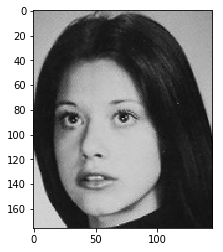

In [223]:
image0_cropped.shape
plt.imshow(image0_cropped)

In [ ]:
'''
PURPOSE: Convert to grayscale
'''
image0_gray  = rgb2gray(image0)
image1_gray = rgb2gray(image1)

plt.imshow(image1_gray)

In [ ]:
#RESIZE

image0_final = imresize(image0_gray, (32,32))
type(image0_resized)
print(image0.shape, image0_resized.shape)
plt.imshow(image0_resized)


image1_final = imresize(image1_gray, (32,32))
type(image1_resized)
print(image1.shape, image1_resized.shape)
plt.imshow(image1_resized)


plt.imshow(image0_final)



In [ ]:
#stack images
two_img_data = np.stack(image0_final,image1_final)


In [ ]:
try:
   urllib.urlretrieve(facescrub_actresses_trimmed.loc[,'URL'], image_name_w_path)
except Exception:
    sys.exc_clear()

image = ndimage.imread(image_name_w_path)
print(facescrub_actresses_trimmed.loc[1,'URL'])



In [ ]:
#store

In [ ]:
#crop

In [ ]:
#conver to grayscale

In [ ]:
#create data set
#x
#y